In [5]:
import json
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set_style('whitegrid')
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 100)

In [6]:
#source - https://fantasy.premierleague.com/drf/bootstrap-static
with open('data1.json', encoding = 'utf8') as data_file:    
    data = json.load(data_file)

In [7]:
for i,j in data.items():
    pprint(i)

'elements'
'total-players'
'player'
'element_types'
'watched'
'next-event'
'phases'
'stats'
'game-settings'
'current-event'
'teams'
'stats_options'
'last-entry-event'
'entry'
'next_event_fixtures'
'events'


In [8]:
data['stats_options']

[{'name': 'Total score', 'key': 'total_points'},
 {'name': 'Round score', 'key': 'event_points'},
 {'name': 'Price', 'key': 'now_cost'},
 {'name': 'Teams selected by %', 'key': 'selected_by_percent'},
 {'name': 'Minutes played', 'key': 'minutes'},
 {'name': 'Goals scored', 'key': 'goals_scored'},
 {'name': 'Assists', 'key': 'assists'},
 {'name': 'Clean sheets', 'key': 'clean_sheets'},
 {'name': 'Goals conceded', 'key': 'goals_conceded'},
 {'name': 'Own goals', 'key': 'own_goals'},
 {'name': 'Penalties saved', 'key': 'penalties_saved'},
 {'name': 'Penalties missed', 'key': 'penalties_missed'},
 {'name': 'Yellow cards', 'key': 'yellow_cards'},
 {'name': 'Red cards', 'key': 'red_cards'},
 {'name': 'Saves', 'key': 'saves'},
 {'name': 'Bonus', 'key': 'bonus'},
 {'name': 'Bonus Points System', 'key': 'bps'},
 {'name': 'Influence', 'key': 'influence'},
 {'name': 'Creativity', 'key': 'creativity'},
 {'name': 'Threat', 'key': 'threat'},
 {'name': 'ICT Index', 'key': 'ict_index'},
 {'name': 'For

In [9]:
data['game-settings']

{'game': {'scoring_ea_index': 0,
  'league_prefix_public': 'League',
  'bps_tackles': 2,
  'league_h2h_tiebreak': '+goals_scored||-goals_conceded',
  'scoring_long_play': 2,
  'bps_recoveries_limit': 3,
  'facebook_app_id': '337309029685327',
  'bps_tackled': -1,
  'bps_errors_leading_to_goal': -3,
  'bps_yellow_cards': -3,
  'ui_el_hide_currency_qi': True,
  'scoring_bonus': 1,
  'transfers_cost': 4,
  'default_formation': [[0, 1, 0, 2, 0],
   [3, 4, 5, 6, 7],
   [8, 9, 10, 11, 12],
   [0, 13, 14, 15, 0]],
  'bps_long_play': 6,
  'bps_long_play_limit': 60,
  'scoring_assists': 3,
  'scoring_long_play_limit': 60,
  'fifa_league_id': 454539,
  'league_size_classic_max': 20,
  'scoring_red_cards': -3,
  'scoring_creativity': 0,
  'game_timezone': 'Europe/London',
  'static_game_url': 'https://ismdj.scdn5.secure.raxcdn.com/static/compass/plfpl/desktop/',
  'currency_symbol': 'Â£',
  'bps_target_missed': -1,
  'bps_penalties_saved': 15,
  'support_email_address': 'plfpl@mail.fantasy.premie

In [10]:
player_data_json = data['elements']
print(player_data_json)

[{'id': 1, 'photo': '48844.jpg', 'web_name': 'Ospina', 'team_code': 3, 'status': 'a', 'code': 48844, 'first_name': 'David', 'second_name': 'Ospina', 'squad_number': 13, 'news': '', 'now_cost': 50, 'chance_of_playing_this_round': None, 'chance_of_playing_next_round': None, 'value_form': '0.0', 'value_season': '0.0', 'cost_change_start': 0, 'cost_change_event': 0, 'cost_change_start_fall': 0, 'cost_change_event_fall': 0, 'in_dreamteam': False, 'dreamteam_count': 0, 'selected_by_percent': '0.2', 'form': '0.0', 'transfers_out': 0, 'transfers_in': 0, 'transfers_out_event': 0, 'transfers_in_event': 0, 'loans_in': 0, 'loans_out': 0, 'loaned_in': 0, 'loaned_out': 0, 'total_points': 2, 'event_points': 0, 'points_per_game': '1.0', 'ep_this': None, 'ep_next': '3.4', 'special': False, 'minutes': 143, 'goals_scored': 0, 'assists': 0, 'clean_sheets': 0, 'goals_conceded': 4, 'own_goals': 0, 'penalties_saved': 0, 'penalties_missed': 0, 'yellow_cards': 0, 'red_cards': 0, 'saves': 4, 'bonus': 0, 'bps': 

In [11]:
player_data_df = pd.DataFrame(player_data_json)
pdata = player_data_df.copy()
pdata.head(10)

,id,photo,web_name,team_code,status,code,first_name,second_name,squad_number,news,now_cost,chance_of_playing_this_round,chance_of_playing_next_round,value_form,value_season,cost_change_start,cost_change_event,cost_change_start_fall,cost_change_event_fall,in_dreamteam,dreamteam_count,selected_by_percent,form,transfers_out,transfers_in,transfers_out_event,transfers_in_event,loans_in,loans_out,loaned_in,loaned_out,total_points,event_points,points_per_game,ep_this,ep_next,special,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,ea_index,element_type,team
0,1,48844.jpg,Ospina,3,a,48844,David,Ospina,13.0,,50,None,NaN,0.0,0.0,0,0,0,0,False,0,0.2,0.0,0,0,0,0,0,0,0,0,2,0,1.0,None,3.4,False,143,0,0,0,4,0,0,0,0,0,4,0,18,28.8,0.0,0.0,2.9,0,1,1
1,2,11334.jpg,Cech,3,a,11334,Petr,Cech,33.0,,55,None,NaN,0.0,0.0,0,0,0,0,False,0,5.6,0.0,0,0,0,0,0,0,0,0,134,0,3.8,None,4.2,False,3097,0,0,12,37,1,0,0,2,0,115,2,660,819.8,0.1,0.0,82.0,0,1,1
2,3,98980.jpg,Martinez,3,u,98980,Damian Emiliano,Martinez,26.0,Season-long loan to Getafe,40,None,0.0,0.0,0.0,0,0,0,0,False,0,1.3,0.0,0,0,0,0,0,0,0,0,8,0,4.0,None,0.0,False,180,0,0,1,3,0,0,0,0,0,5,0,35,30.6,0.0,0.0,3.1,0,1,1
3,4,51507.jpg,Koscielny,3,s,51507,Laurent,Koscielny,6.0,Suspended until 27 Aug,60,None,0.0,0.0,0.0,0,0,0,0,False,0,0.6,0.0,0,0,0,0,0,0,0,0,121,0,3.7,None,0.0,False,2821,2,1,10,37,0,0,0,4,1,0,19,723,831.2,53.9,239.0,112.7,0,2,1
4,5,17127.jpg,Mertesacker,3,d,17127,Per,Mertesacker,4.0,Facial Injury - 75% chance of playing,50,None,75.0,0.0,0.0,0,0,0,0,False,0,0.6,0.0,0,0,0,0,0,0,0,0,1,0,1.0,None,2.1,False,38,0,0,0,1,0,0,0,0,0,0,0,5,17.8,0.1,0.0,1.8,0,2,1
5,6,158074.jpg,Gabriel,3,d,158074,Gabriel Armando,de Abreu,5.0,Knee injury - 25% chance of playing,50,None,25.0,0.0,0.0,0,0,0,0,False,0,0.0,0.0,0,0,0,0,0,0,0,0,45,0,2.4,None,0.7,False,1517,0,0,5,18,0,0,0,6,0,0,2,296,295.8,84.5,119.0,50.0,0,2,1
6,7,98745.jpg,BellerÃ­n,3,a,98745,HÃ©ctor,BellerÃ­n,24.0,,60,None,NaN,0.0,0.0,0,0,0,0,False,0,14.5,0.0,0,0,0,0,0,0,0,0,119,0,3.6,None,3.5,False,2503,1,5,10,34,0,0,0,4,0,0,12,569,437.6,508.3,395.0,133.8,0,2,1
7,8,42427.jpg,Gibbs,3,d,42427,Kieran,Gibbs,3.0,Illness - 75% chance of playing,50,None,75.0,0.0,0.0,0,0,0,0,False,0,0.2,0.0,0,0,0,0,0,0,0,0,45,0,4.1,None,2.1,False,702,0,1,6,3,0,0,0,3,0,0,3,201,142.4,171.4,117.0,43.1,0,2,1
8,9,80254.jpg,Jenkinson,3,a,80254,Carl,Jenkinson,25.0,,45,None,NaN,0.0,0.0,0,0,0,0,False,0,0.4,0.0,0,0,0,0,0,0,0,0,2,0,2.0,None,2.3,False,82,0,0,0,1,0,0,0,0,0,0,0,12,19.4,2.0,0.0,2.1,0,2,1
9,10,38411.jpg,Monreal,3,a,38411,Nacho,Monreal,18.0,,55,None,NaN,0.0,0.0,0,0,0,0,False,0,5.7,0.0,0,0,0,0,0,0,0,0,115,0,3.2,None,3.2,False,3153,0,3,11,43,0,0,0,5,0,0,9,681,554.0,280.3,220.0,105.8,0,2,1


In [12]:
drop_cols = ['chance_of_playing_this_round','chance_of_playing_next_round','code',
            'cost_change_event','cost_change_event_fall','cost_change_start',
            'cost_change_start_fall','dreamteam_count','ea_index','ep_this',
            'event_points','form','ict_index','in_dreamteam','loaned_in',
            'loaned_out','loans_in','loans_out','news','photo','special',
            'squad_number','status', 'transfers_out','transfers_in',
             'transfers_out_event','transfers_in_event','value_form','value_season']

In [13]:
pdata.drop(drop_cols, axis = 1, inplace = True)
pdata.columns

Index(['id', 'web_name', 'team_code', 'first_name', 'second_name', 'now_cost',
       'selected_by_percent', 'total_points', 'points_per_game', 'ep_next',
       'minutes', 'goals_scored', 'assists', 'clean_sheets', 'goals_conceded',
       'own_goals', 'penalties_saved', 'penalties_missed', 'yellow_cards',
       'red_cards', 'saves', 'bonus', 'bps', 'influence', 'creativity',
       'threat', 'element_type', 'team'],
      dtype='object')

In [14]:
pdata['full_name'] = pdata.first_name + " " + pdata.second_name
pdata['elememt_type_name'] = pdata.element_type.map({x['id']:x['singular_name_short'] for x in data['element_types']})

In [15]:
pdata.head()

,id,web_name,team_code,first_name,second_name,now_cost,selected_by_percent,total_points,points_per_game,ep_next,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,element_type,team,full_name,elememt_type_name
0,1,Ospina,3,David,Ospina,50,0.2,2,1.0,3.4,143,0,0,0,4,0,0,0,0,0,4,0,18,28.8,0.0,0.0,1,1,David Ospina,GKP
1,2,Cech,3,Petr,Cech,55,5.6,134,3.8,4.2,3097,0,0,12,37,1,0,0,2,0,115,2,660,819.8,0.1,0.0,1,1,Petr Cech,GKP
2,3,Martinez,3,Damian Emiliano,Martinez,40,1.3,8,4.0,0.0,180,0,0,1,3,0,0,0,0,0,5,0,35,30.6,0.0,0.0,1,1,Damian Emiliano Martinez,GKP
3,4,Koscielny,3,Laurent,Koscielny,60,0.6,121,3.7,0.0,2821,2,1,10,37,0,0,0,4,1,0,19,723,831.2,53.9,239.0,2,1,Laurent Koscielny,DEF
4,5,Mertesacker,3,Per,Mertesacker,50,0.6,1,1.0,2.1,38,0,0,0,1,0,0,0,0,0,0,0,5,17.8,0.1,0.0,2,1,Per Mertesacker,DEF


In [16]:
pdata.info()
pdata.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 30 columns):
id                     501 non-null int64
web_name               501 non-null object
team_code              501 non-null int64
first_name             501 non-null object
second_name            501 non-null object
now_cost               501 non-null int64
selected_by_percent    501 non-null object
total_points           501 non-null int64
points_per_game        501 non-null object
ep_next                501 non-null object
minutes                501 non-null int64
goals_scored           501 non-null int64
assists                501 non-null int64
clean_sheets           501 non-null int64
goals_conceded         501 non-null int64
own_goals              501 non-null int64
penalties_saved        501 non-null int64
penalties_missed       501 non-null int64
yellow_cards           501 non-null int64
red_cards              501 non-null int64
saves                  501 non-null int64
bonus  

(501, 30)

In [17]:
'''pdata = pdata.loc(axis=0)[:,['full_name','first_name','second_name', 'element_type',
                     'element_type_name','id','team', 'team_code', 'web_name',
                     'saves','penalties_saved','clean_sheets','goals_conceded',
                     'bonus', 'bps','creativity','ep_next','influence', 'threat',
                     'goals_scored','assists','minutes', 'own_goals',
                     'yellow_cards', 'red_cards','penalties_missed',
                     'selected_by_percent', 'now_cost','points_per_game','total_points']]'''

"pdata = pdata.loc(axis=0)[:,['full_name','first_name','second_name', 'element_type',\n                     'element_type_name','id','team', 'team_code', 'web_name',\n                     'saves','penalties_saved','clean_sheets','goals_conceded',\n                     'bonus', 'bps','creativity','ep_next','influence', 'threat',\n                     'goals_scored','assists','minutes', 'own_goals',\n                     'yellow_cards', 'red_cards','penalties_missed',\n                     'selected_by_percent', 'now_cost','points_per_game','total_points']]"

In [18]:
pdata['team'] = pdata.team.map({x['id']:x['name'] for x in data['teams']})

In [19]:
pdata.head()

,id,web_name,team_code,first_name,second_name,now_cost,selected_by_percent,total_points,points_per_game,ep_next,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,element_type,team,full_name,elememt_type_name
0,1,Ospina,3,David,Ospina,50,0.2,2,1.0,3.4,143,0,0,0,4,0,0,0,0,0,4,0,18,28.8,0.0,0.0,1,Arsenal,David Ospina,GKP
1,2,Cech,3,Petr,Cech,55,5.6,134,3.8,4.2,3097,0,0,12,37,1,0,0,2,0,115,2,660,819.8,0.1,0.0,1,Arsenal,Petr Cech,GKP
2,3,Martinez,3,Damian Emiliano,Martinez,40,1.3,8,4.0,0.0,180,0,0,1,3,0,0,0,0,0,5,0,35,30.6,0.0,0.0,1,Arsenal,Damian Emiliano Martinez,GKP
3,4,Koscielny,3,Laurent,Koscielny,60,0.6,121,3.7,0.0,2821,2,1,10,37,0,0,0,4,1,0,19,723,831.2,53.9,239.0,2,Arsenal,Laurent Koscielny,DEF
4,5,Mertesacker,3,Per,Mertesacker,50,0.6,1,1.0,2.1,38,0,0,0,1,0,0,0,0,0,0,0,5,17.8,0.1,0.0,2,Arsenal,Per Mertesacker,DEF


In [20]:
pdata.corr()['total_points']

id                 -0.087756
team_code          -0.058783
now_cost            0.592595
total_points        1.000000
minutes             0.900990
goals_scored        0.711255
assists             0.703371
clean_sheets        0.889073
goals_conceded      0.753940
own_goals           0.103359
penalties_saved     0.113341
penalties_missed    0.292188
yellow_cards        0.545764
red_cards           0.129938
saves               0.213275
bonus               0.875165
bps                 0.940472
element_type        0.040511
Name: total_points, dtype: float64

In [21]:
pdata.pivot_table(index = 'elememt_type_name', values = 'total_points', aggfunc = np.mean)

,total_points
elememt_type_name,
DEF,51.744048
FWD,58.542857
GKP,51.229167
MID,54.181395


In [22]:
pdata.pivot_table(index='elememt_type_name', values='total_points', aggfunc=np.median)

,total_points
elememt_type_name,
DEF,46.5
FWD,49.5
GKP,21.5
MID,43.0


In [23]:
pdata.elememt_type_name.value_counts()

MID    215
DEF    168
FWD     70
GKP     48
Name: elememt_type_name, dtype: int64

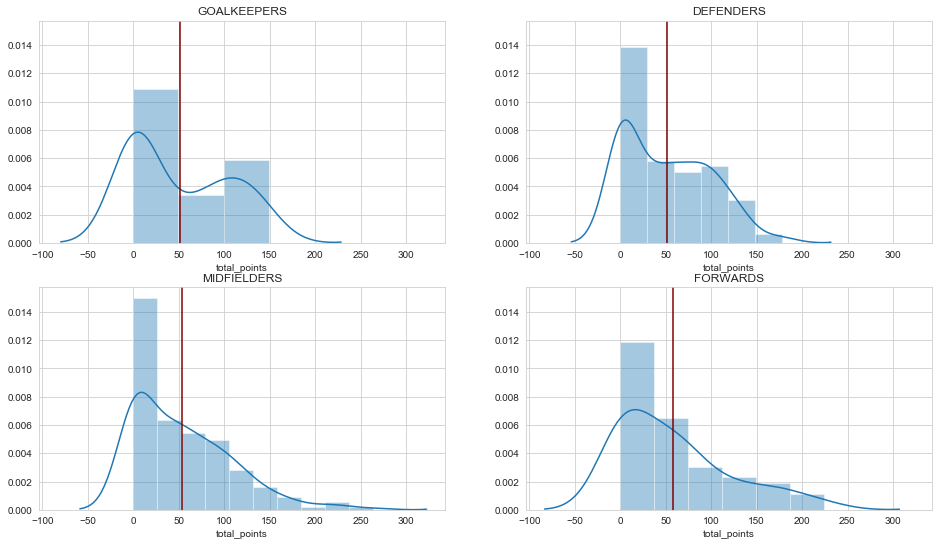

In [24]:
f = plt.figure(figsize = (16,9))

ax1 = f.add_subplot(2,2,1)
ax2 = f.add_subplot(2,2,2, sharex = ax1, sharey = ax1)
ax3 = f.add_subplot(2,2,3, sharex = ax1, sharey = ax1)
ax4 = f.add_subplot(2,2,4, sharex = ax1, sharey = ax1)

ax1.set_title('GOALKEEPERS')
sns.distplot(pdata[pdata.elememt_type_name == 'GKP'].total_points, label = 'GKP', ax=ax1)
ax1.axvline(np.mean(pdata[pdata.elememt_type_name == 'GKP'].total_points), color = 'maroon', label = 'mean')

ax2.set_title('DEFENDERS')
sns.distplot(pdata[pdata.elememt_type_name == 'DEF'].total_points, label = 'DEF', ax = ax2)
ax2.axvline(np.mean(pdata[pdata.elememt_type_name == 'DEF'].total_points), color = 'maroon', label = 'mean')

ax3.set_title('MIDFIELDERS')
sns.distplot(pdata[pdata.elememt_type_name == 'MID'].total_points, label = 'MID', ax = ax3)
ax3.axvline(np.mean(pdata[pdata.elememt_type_name == 'MID'].total_points), color = 'maroon', label = 'mean')

ax4.set_title('FORWARDS')
sns.distplot(pdata[pdata.elememt_type_name == 'FWD'].total_points, label = 'FWD', ax = ax4)
ax4.axvline(np.mean(pdata[pdata.elememt_type_name == 'FWD'].total_points), color = 'maroon', label = 'mean')

plt.show()

DISTRIBUTION OF PLAYERS BASED ON THEIR POSITIONS AND MEAN


In [25]:
len(pdata[(pdata.total_points==0)]) / pdata.shape[0]

0.2554890219560878

In [26]:
pdata[(pdata.total_points == 0)&(pdata.minutes == 0)]

,id,web_name,team_code,first_name,second_name,now_cost,selected_by_percent,total_points,points_per_game,ep_next,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,element_type,team,full_name,elememt_type_name
12,13,Kolasinac,3,Sead,Kolasinac,60,11.9,0,0.0,3.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2,Arsenal,Sead Kolasinac,DEF
27,28,Lacazette,3,Alexandre,Lacazette,105,17.6,0,0.0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,4,Arsenal,Alexandre Lacazette,FWD
52,53,MÃ¤enpÃ¤Ã¤,36,Niki,MÃ¤enpÃ¤Ã¤,40,1.5,0,0.0,0.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1,Brighton,Niki MÃ¤enpÃ¤Ã¤,GKP
53,54,Ryan,36,Mathew,Ryan,45,0.8,0,0.0,1.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1,Brighton,Mathew Ryan,GKP
54,55,Dunk,36,Lewis,Dunk,45,2.1,0,0.0,0.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2,Brighton,Lewis Dunk,DEF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,Hayden,4,Isaac,Hayden,45,0.2,0,0.0,-0.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,3,Newcastle,Isaac Hayden,MID
496,497,Choupo-Moting,110,Eric Maxim,Choupo-Moting,55,0.2,0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,3,Stoke,Eric Maxim Choupo-Moting,MID
497,498,Walker-Peters,6,Kyle,Walker-Peters,45,0.3,0,0.0,3.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2,Spurs,Kyle Walker-Peters,DEF
499,500,Lemina,20,Mario,Lemina,50,0.1,0,0.0,2.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,3,Southampton,Mario Lemina,MID


In [27]:
impute_cols = ['saves','penalties_saved', 'clean_sheets', 'goals_conceded', 'bonus', 'bps',
               'creativity', 'influence', 'threat', 'goals_scored','assists', 'minutes', 'own_goals',
               'yellow_cards', 'red_cards','penalties_missed','points_per_game', 'total_points']
positions = set(pdata.elememt_type_name)
costs = set(pdata.now_cost)
medians = {}
stds = {}

In [28]:
for i in positions:
    medians['{}'.format(i)] = {}
    for c in costs:
        medians['{}'.format(i)]['{}'.format(c)] = {}
        for j in impute_cols:
            if pdata[(pdata.total_points!=0)&(pdata.minutes!=0)&(pdata.elememt_type_name==str(i))&(pdata.now_cost==c)].shape[0] > 0:
                median = np.median(pdata[(pdata.total_points!=0)&(pdata.minutes!=0)&(pdata.elememt_type_name==i)&(pdata.now_cost==c)][j].astype(np.float32))
                medians['{}'.format(i)]['{}'.format(c)]['{}'.format(j)] = median
            else:
                medians['{}'.format(i)]['{}'.format(c)]['{}'.format(j)] = 0

In [29]:
for i in positions:
    stds['{}'.format(i)] = {}
    for c in costs:
        stds['{}'.format(i)]['{}'.format(c)] = {}
        for j in impute_cols:
            if pdata[(pdata.total_points!=0)&(pdata.minutes!=0)&(pdata.elememt_type_name==str(i))&(pdata.now_cost==c)].shape[0] > 0:
                std = np.std(pdata[(pdata.total_points!=0)&(pdata.minutes!=0)&(pdata.elememt_type_name==i)&(pdata.now_cost==c)][j].astype(np.float32))
                stds['{}'.format(i)]['{}'.format(c)]['{}'.format(j)] = std
            else:
                stds['{}'.format(i)]['{}'.format(c)]['{}'.format(j)] = 0

In [30]:
for idx, row in pdata[(pdata.total_points==0)&(pdata.minutes==0)].iterrows():
    for col in impute_cols:
        pdata.loc[idx,col] = medians[str(row['elememt_type_name'])][str(row['now_cost'])][str(col)] + np.abs((np.random.randn()/1.5)*stds[str(row['elememt_type_name'])][str(row['now_cost'])][str(col)])

In [31]:
pdata[pdata.full_name == 'Lewis Dunk']

,id,web_name,team_code,first_name,second_name,now_cost,selected_by_percent,total_points,points_per_game,ep_next,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,element_type,team,full_name,elememt_type_name
54,55,Dunk,36,Lewis,Dunk,45,2.1,62.012489,2.57087,0.8,1264.244856,0.679009,0.634158,5.251623,33.709802,0.070124,0.0,0.0,4.863281,0.070257,0.0,2.548271,258.894902,437.14,85.1128,64.0142,2,Brighton,Lewis Dunk,DEF


In [32]:
len(pdata[(pdata.total_points==0)]) / pdata.shape[0]

0.0

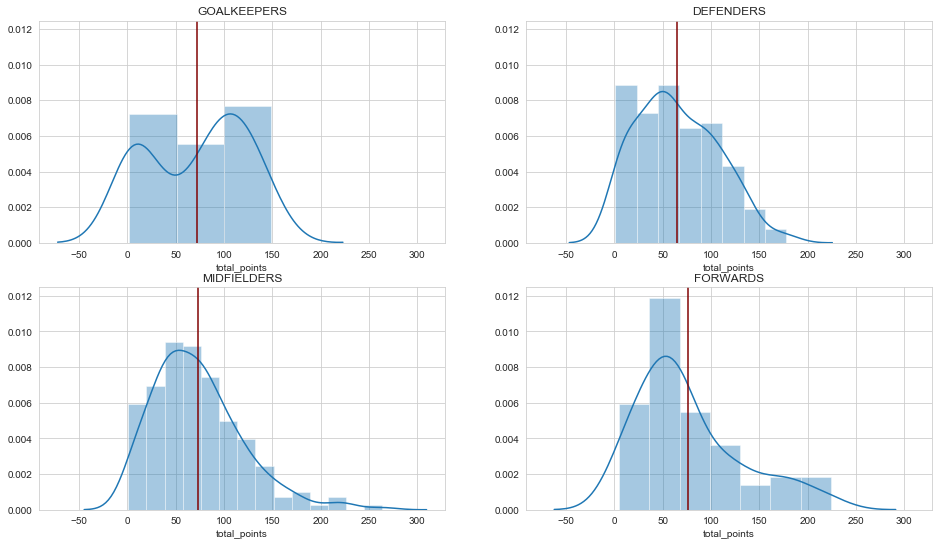

In [33]:
f = plt.figure(figsize = (16,9))

ax1 = f.add_subplot(2,2,1)
ax2 = f.add_subplot(2,2,2, sharex = ax1, sharey = ax1)
ax3 = f.add_subplot(2,2,3, sharex = ax1, sharey = ax1)
ax4 = f.add_subplot(2,2,4, sharex = ax1, sharey = ax1)

ax1.set_title('GOALKEEPERS')
sns.distplot(pdata[pdata.elememt_type_name == 'GKP'].total_points, label = 'GKP', ax=ax1)
ax1.axvline(np.mean(pdata[pdata.elememt_type_name == 'GKP'].total_points), color = 'maroon', label = 'mean')

ax2.set_title('DEFENDERS')
sns.distplot(pdata[pdata.elememt_type_name == 'DEF'].total_points, label = 'DEF', ax = ax2)
ax2.axvline(np.mean(pdata[pdata.elememt_type_name == 'DEF'].total_points), color = 'maroon', label = 'mean')

ax3.set_title('MIDFIELDERS')
sns.distplot(pdata[pdata.elememt_type_name == 'MID'].total_points, label = 'MID', ax = ax3)
ax3.axvline(np.mean(pdata[pdata.elememt_type_name == 'MID'].total_points), color = 'maroon', label = 'mean')

ax4.set_title('FORWARDS')
sns.distplot(pdata[pdata.elememt_type_name == 'FWD'].total_points, label = 'FWD', ax = ax4)
ax4.axvline(np.mean(pdata[pdata.elememt_type_name == 'FWD'].total_points), color = 'maroon', label = 'mean')

plt.show()

In [34]:
pdata.pivot_table(index='elememt_type_name', values='total_points', aggfunc=np.mean)


,total_points
elememt_type_name,
DEF,65.377098
FWD,76.650101
GKP,71.910389
MID,72.699767


In [35]:
pdata.pivot_table(index='elememt_type_name', values='total_points', aggfunc=np.median)


,total_points
elememt_type_name,
DEF,59.5
FWD,63.0
GKP,87.5
MID,68.0


In [43]:
#Linear Programming Library
from puLP import *


ModuleNotFoundError: No module named 'puLP'